# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning: invalid escape sequence '\$'
<>:55: SyntaxWarning: invalid escape sequence '\$'
C:\Users\lilla\AppData\Local\Temp\ipykernel_2760\1842324635.py:55: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


id                                               name  host_id  \
0   6983                               Copenhagen 'N Livin'    16774   
1  26057                Lovely house - most attractive area   109777   
2  26473          City Centre Townhouse Sleeps 1-10 persons   112210   
3  29118                    Best Location in Cool Istedgade   125230   
4  31094  Beautiful, spacious, central, renovated Penthouse   129976   

  host_name     neighbourhood_cleansed   latitude  longitude        room_type  \
0     Simon                   Nørrebro  55.686410  12.547410  Entire home/apt   
1      Kari                   Indre By  55.693070  12.576490  Entire home/apt   
2     Julia                   Indre By  55.676020  12.575400  Entire home/apt   
3      Nana  Vesterbro-Kongens Enghave  55.670230  12.555040  Entire home/apt   
4      Ebbe  Vesterbro-Kongens Enghave  55.666602  12.555283  Entire home/apt   

    price  minimum_nights  ...  review_scores_accuracy  \
0   898.0               3  ...                    4.79   
1  2600.0               4  ...                    4.93   
2  3250.0               3  ...                    4.63   
3   725.0               7  ...                    4.87   
4  1954.0               3  ...                    4.82   

  review_scores_cleanliness  review_scores_checkin  \
0                      4.78                   4.86   
1                      4.96                   4.93   
2                      4.44                   4.78   
3                      4.73                   5.00   
4                      4.88                   4.87   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.89                    4.73                 4.71   
1                         4.86                    4.94                 4.81   
2                         4.70                    4.89                 4.59   
3                         5.00                    4.87                 4.80   
4                         4.82                    4.80                 4.53   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               1.08                               1                 0   
1               0.55                               1               303   
2               2.06                               3                56   
3               0.16                               1                59   
4               0.13                               1                 0   

   price_category  
0               0  
1               1  
2               1  
3               0  
4               1  

[5 rows x 23 columns]

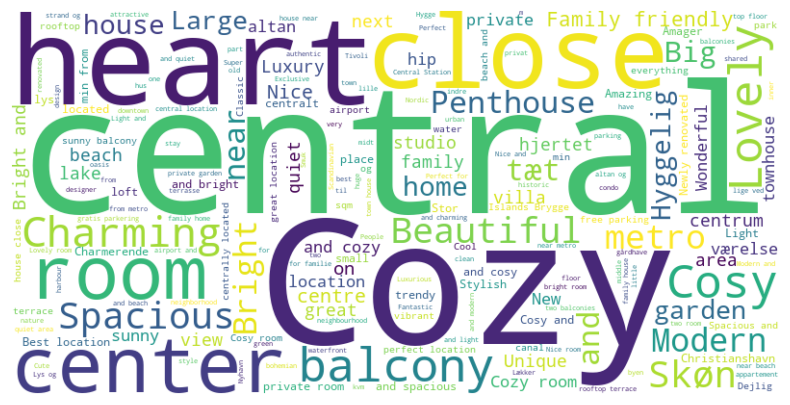

In [79]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

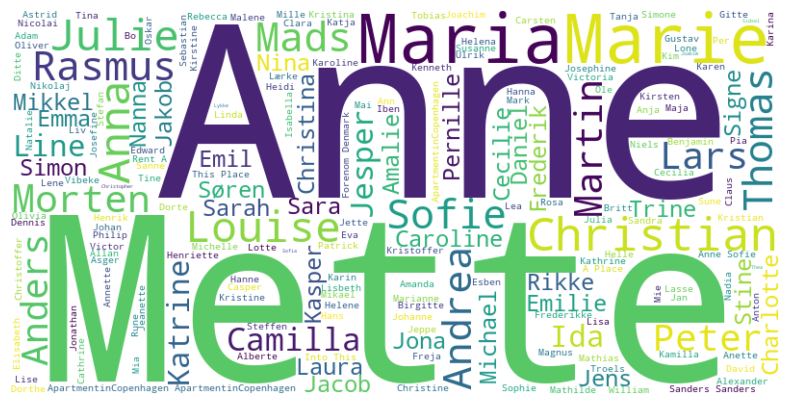

In [80]:
# State your solution here. Add more cells if needed.

# Convert the 'name' column to a single string
hosts_to_string = ' '.join(data_filtered['host_name'].astype(str))

# List of stop words
stop_words = ['&','og', '+','and','/']

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(hosts_to_string)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [81]:
# State your solution here. Add more cells if needed.

""" import folium

#Copenhagen map
map = folium.Map(location=[55.6761, 12.5683], zoom_start=13)

longitudes = data_filtered['longitude']
latitudes = data_filtered['latitude']

# Loop through the coordinates and add a marker for each listing
for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon], popup='Listing').add_to(map)
    
map 

#Performance was terrible, used plotly insteads
"""

import plotly.express as px

# Create a DataFrame with the latitude and longitude columns
map_data = data_filtered[['latitude', 'longitude', 'name', 'price', 'review_scores_rating']]

# Plot the data 
map = px.scatter_mapbox(
    map_data,
    lat="latitude", 
    lon="longitude", 
    hover_name="name",
    hover_data={
        "price": True,
        "review_scores_rating": True, 
        "latitude": False,
        "longitude": False
    },
    # Extras
    color="price",  
    color_continuous_scale="Cividis", 
    range_color=[0,5000],
    zoom=10,
    height=600
)

# Update layout to use an open-street map
map.update_layout(mapbox_style="open-street-map")

# Show the map
map.show()





### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

In [120]:
# State your solution here. Add more cells if needed.

# Create a DataFrame with the relevant columns
boxplot_data = data_filtered[['neighbourhood_cleansed', 'price']]

# Plot the boxplot using Plotly
fig = px.box(
    boxplot_data,
    x="neighbourhood_cleansed",  # Neighborhoods on the x-axis
    y="price",  # Price on the y-axis
    
    title="Distribution of Prices by Neighborhood",
    labels={"neighbourhood_cleansed": "Neighborhood", "price": "Price"},
    color="neighbourhood_cleansed",  # Color by neighborhood for clarity
    range_y=[0, 2000]  # Adjust the y-axis range based on your data

)

# Show the plot
fig.show()

In [83]:
# Create a DataFrame with the relevant columns
boxplot_review_scores = data_filtered[['neighbourhood_cleansed', 'review_scores_rating']]

# Plot the boxplot using Plotly
fig = px.box(
    boxplot_review_scores,
    x="neighbourhood_cleansed",  # Neighborhoods on the x-axis
    y="review_scores_rating",  # Review scores on the y-axis
    title="Distribution of Review Scores by Neighborhood",
    labels={"neighbourhood_cleansed": "Neighborhood", "review_scores_rating": "Review Score"},
    color="neighbourhood_cleansed"  # Color by neighborhood for clarity
)

# Show the plot
fig.show()


In [84]:
# Create a DataFrame with the relevant columns
boxplot_reviews_per_month = data_filtered[['neighbourhood_cleansed', 'reviews_per_month']]

# Plot the boxplot using Plotly
fig_reviews_per_month = px.box(
    boxplot_reviews_per_month,
    x="neighbourhood_cleansed",  # Neighborhoods on the x-axis
    y="reviews_per_month",  # Reviews per month on the y-axis
    title="Distribution of Reviews Per Month by Neighborhood",
    labels={"neighbourhood_cleansed": "Neighborhood", "reviews_per_month": "Reviews Per Month"},
    color="neighbourhood_cleansed"  # Color by neighborhood for clarity
)

# Show the plot
fig_reviews_per_month.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [135]:
# Get the description of statistics
desc_stats = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['price'].describe()

# Calculate the variance 
variance = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['price'].var().round(2)

# Add variance to the summary statistics
desc_stats_with_variance = pd.concat([desc_stats, variance.rename('variance')], axis=1)

# Display the result with variance included
display(desc_stats_with_variance)


count         mean          std  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  1234.226623   832.696891   
                          Private room      148.0  1032.966216  5299.018095   
                          Shared room         2.0  1051.500000   112.429978   
Amager st                 Entire home/apt   791.0  1093.584071   721.982284   
                          Hotel room          3.0  1296.000000   211.184753   
                          Private room      129.0   549.325581   293.995992   
                          Shared room         1.0  2575.000000          NaN   
Bispebjerg                Entire home/apt   508.0   992.592520  1981.580545   
                          Private room       95.0   488.978947   353.674089   
                          Shared room         1.0   198.000000          NaN   
Brønshøj-Husum            Entire home/apt   216.0  1014.995370   555.669548   
                          Private room       67.0   445.552239   201.631624   
                          Shared room         2.0   211.500000    16.263456   
Frederiksberg             Entire home/apt  1044.0  1292.472222  1958.802772   
                          Private room      133.0   621.706767   567.611220   
Indre By                  Entire home/apt  1702.0  1642.387192  1072.616232   
                          Hotel room         10.0  1077.200000   654.255098   
                          Private room      128.0   698.984375   380.070466   
                          Shared room         4.0   292.000000    67.577116   
Nørrebro                  Entire home/apt  1889.0  1047.742192   583.703218   
                          Private room      165.0   650.121212   760.270040   
                          Shared room         3.0   324.666667   130.481161   
Valby                     Entire home/apt   450.0  1017.968889   635.434691   
                          Private room       89.0   498.157303   288.616366   
Vanløse                   Entire home/apt   254.0   954.425197   496.658320   
                          Private room       44.0   413.409091   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  1181.435119   698.122481   
                          Private room      221.0   574.366516   295.726896   
                          Shared room         2.0   330.500000   113.844192   
Østerbro                  Entire home/apt  1174.0  1248.551107  1438.908216   
                          Private room      130.0   605.461538   437.259030   
                          Shared room         1.0   469.000000          NaN   

                                              min      25%     50%      75%  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   250.0   814.00  1050.0  1480.00   
                          Private room      200.0   400.00   500.0   655.00   
                          Shared room       972.0  1011.75  1051.5  1091.25   
Amager st                 Entire home/apt   240.0   700.00   900.0  1200.00   
                          Hotel room       1149.0  1175.00  1201.0  1369.50   
                          Private room      135.0   400.00   471.0   600.00   
                          Shared room      2575.0  2575.00  2575.0  2575.00   
Bispebjerg                Entire home/apt   235.0   600.00   800.0  1000.00   
                          Private room      143.0   300.00   400.0   528.50   
                          Shared room       198.0   198.00   198.0   198.00   
Brønshøj-Husum            Entire home/apt   250.0   655.75   900.0  1250.00   
                          Private room      145.0   320.00   400.0   500.00   
                          Shared room       200.0   205.75   211.5   217.25   
Frederiksberg             Entire home/apt   300.0   822.50  1037.0  1400.00   
                          Private room      185.0   400.00   500.0   700.00   
Indre By      

In [132]:
# State your solution here. Add more cells if needed.

import numpy as np
# .describe() computes descriptive statistics for price grouped by room type for each neighbourhood
display(data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])['price'].describe())
display(np.var(data_filtered['price']))
display(data_filtered.groupby(['neighbourhood_cleansed'])['price'].describe())
display(data_filtered.groupby(['room_type'])['price'].describe())


count         mean          std  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  1234.226623   832.696891   
                          Private room      148.0  1032.966216  5299.018095   
                          Shared room         2.0  1051.500000   112.429978   
Amager st                 Entire home/apt   791.0  1093.584071   721.982284   
                          Hotel room          3.0  1296.000000   211.184753   
                          Private room      129.0   549.325581   293.995992   
                          Shared room         1.0  2575.000000          NaN   
Bispebjerg                Entire home/apt   508.0   992.592520  1981.580545   
                          Private room       95.0   488.978947   353.674089   
                          Shared room         1.0   198.000000          NaN   
Brønshøj-Husum            Entire home/apt   216.0  1014.995370   555.669548   
                          Private room       67.0   445.552239   201.631624   
                          Shared room         2.0   211.500000    16.263456   
Frederiksberg             Entire home/apt  1044.0  1292.472222  1958.802772   
                          Private room      133.0   621.706767   567.611220   
Indre By                  Entire home/apt  1702.0  1642.387192  1072.616232   
                          Hotel room         10.0  1077.200000   654.255098   
                          Private room      128.0   698.984375   380.070466   
                          Shared room         4.0   292.000000    67.577116   
Nørrebro                  Entire home/apt  1889.0  1047.742192   583.703218   
                          Private room      165.0   650.121212   760.270040   
                          Shared room         3.0   324.666667   130.481161   
Valby                     Entire home/apt   450.0  1017.968889   635.434691   
                          Private room       89.0   498.157303   288.616366   
Vanløse                   Entire home/apt   254.0   954.425197   496.658320   
                          Private room       44.0   413.409091   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  1181.435119   698.122481   
                          Private room      221.0   574.366516   295.726896   
                          Shared room         2.0   330.500000   113.844192   
Østerbro                  Entire home/apt  1174.0  1248.551107  1438.908216   
                          Private room      130.0   605.461538   437.259030   
                          Shared room         1.0   469.000000          NaN   

                                              min      25%     50%      75%  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   250.0   814.00  1050.0  1480.00   
                          Private room      200.0   400.00   500.0   655.00   
                          Shared room       972.0  1011.75  1051.5  1091.25   
Amager st                 Entire home/apt   240.0   700.00   900.0  1200.00   
                          Hotel room       1149.0  1175.00  1201.0  1369.50   
                          Private room      135.0   400.00   471.0   600.00   
                          Shared room      2575.0  2575.00  2575.0  2575.00   
Bispebjerg                Entire home/apt   235.0   600.00   800.0  1000.00   
                          Private room      143.0   300.00   400.0   528.50   
                          Shared room       198.0   198.00   198.0   198.00   
Brønshøj-Husum            Entire home/apt   250.0   655.75   900.0  1250.00   
                          Private room      145.0   320.00   400.0   500.00   
                          Shared room       200.0   205.75   211.5   217.25   
Frederiksberg             Entire home/apt   300.0   822.50  1037.0  1400.00   
                          Private room      185.0   400.00   500.0   700.00   
Indre By      

np.float64(1529216.69724765)

count         mean          std    min     25%  \
neighbourhood_cleansed                                                       
Amager Vest                1059.0  1205.754485  2121.656424  200.0  722.00   
Amager st                   924.0  1019.860390   704.769611  135.0  650.00   
Bispebjerg                  604.0   912.066225  1831.810612  143.0  542.25   
Brønshøj-Husum              285.0   875.487719   552.009744  145.0  500.00   
Frederiksberg              1177.0  1216.676296  1866.619993  185.0  750.00   
Indre By                   1844.0  1570.907267  1065.975980  165.0  995.00   
Nørrebro                   2057.0  1014.792902   609.390458   79.0  720.00   
Valby                       539.0   932.137291   622.836251  127.0  600.00   
Vanløse                     298.0   874.543624   502.561017  200.0  536.75   
Vesterbro-Kongens Enghave  2034.0  1114.638643   692.600286  186.0  760.25   
Østerbro                   1305.0  1183.891188  1385.237978  200.0  750.00   

                              50%      75%      max  
neighbourhood_cleansed                               
Amager Vest                1000.0  1400.00  64900.0  
Amager st                   851.0  1190.00  10000.0  
Bispebjerg                  747.5   961.00  44000.0  
Brønshøj-Husum              750.0  1100.00   4462.0  
Frederiksberg              1000.0  1339.00  58000.0  
Indre By                   1350.0  1870.50  20000.0  
Nørrebro                    900.0  1199.00  12500.0  
Valby                       800.0  1119.50   7429.0  
Vanløse                     750.5  1091.75   3643.0  
Vesterbro-Kongens Enghave   999.0  1299.00  10800.0  
Østerbro                    979.0  1331.00  41800.0

count         mean          std    min    25%     50%  \
room_type                                                                  
Entire home/apt  10748.0  1222.568850  1129.408353  216.0  800.0  1000.0   
Hotel room          13.0  1127.692308   581.099731  204.0  830.0  1306.0   
Private room      1349.0   628.350630  1805.824422   79.0  388.0   500.0   
Shared room         16.0   535.687500   608.196209  174.0  223.0   333.0   

                    75%      max  
room_type                         
Entire home/apt  1400.0  58000.0  
Hotel room       1538.0   1862.0  
Private room      650.0  64900.0  
Shared room       425.5   2575.0

In [86]:
# new column - ratings rounded to whole numbers
data_filtered['rating_rounded'] = data_filtered['review_scores_value'].round(0)

data_filtered.groupby(['neighbourhood_cleansed', 'rating_rounded'])['price'].describe()

count         mean          std  \
neighbourhood_cleansed    rating_rounded                                     
Amager Vest               1.0                1.0  1300.000000          NaN   
                          3.0                8.0  2296.375000  2306.705067   
                          4.0              155.0  1236.922581   966.095660   
                          5.0              895.0  1190.502793  2261.348391   
Amager st                 1.0                1.0   600.000000          NaN   
                          3.0                4.0   839.750000   285.338834   
                          4.0              172.0  1102.726744   916.591053   
                          5.0              747.0  1002.306560   647.565996   
Bispebjerg                2.0                1.0   450.000000          NaN   
                          3.0                4.0   619.750000   266.748789   
                          4.0              117.0   825.068376   464.071575   
                          5.0              482.0   936.568465  2037.312522   
Brønshøj-Husum            3.0                4.0   646.250000   402.147879   
                          4.0               51.0   967.333333   538.801658   
                          5.0              230.0   859.108696   556.173539   
Frederiksberg             3.0                5.0   950.000000   229.128785   
                          4.0              200.0  1129.705000   637.365296   
                          5.0              972.0  1235.943416  2033.251361   
Indre By                  1.0                1.0  2000.000000          NaN   
                          2.0                2.0  1956.500000   504.167135   
                          3.0               10.0  1174.200000   428.794382   
                          4.0              402.0  1616.835821  1019.627578   
                          5.0             1429.0  1559.923023  1082.173255   
Nørrebro                  2.0                1.0  1795.000000          NaN   
                          3.0                9.0   930.555556   268.562894   
                          4.0              370.0  1060.483784   885.240537   
                          5.0             1677.0  1004.698867   530.765530   
Valby                     1.0                2.0   734.500000    92.630988   
                          3.0                3.0  1833.333333  1877.054430   
                          4.0              105.0   784.733333   345.242509   
                          5.0              429.0   962.834499   655.765446   
Vanløse                   3.0                1.0   950.000000          NaN   
                          4.0               57.0   918.947368   602.387880   
                          5.0              240.0   863.683333   477.727351   
Vesterbro-Kongens Enghave 2.0                1.0  2000.000000          NaN   
                          3.0                7.0  1768.142857  1479.304164   
                          4.0              286.0  1157.020979   870.063256   
                          5.0             1740.0  1104.534483   653.155135   
Østerbro                  2.0                5.0  1472.800000   346.385190   
                          3.0               11.0   893.727273   287.230253   
                          4.0              218.0  1243.495413   941.177355   
                          5.0             1071.0  1173.390289  1468.186702   

                                             min      25%     50%      75%  \
neighbourhood_cleansed    rating_rounded                                     
Amager Vest               1.0             1300.0  1300.00  1300.0  1300.00   
                          3.0              500.0  1023.25  1550.0  2227.75   
                          4.0              249.0   750.00   994.0  1475.00   
                          5.0              200.0   712.00  1000.0  1399.50   
Amager st                 1.0              600.0   600.00   600.0   600.00   
                          3.0              483.0   683.25   872.

### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

In [87]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


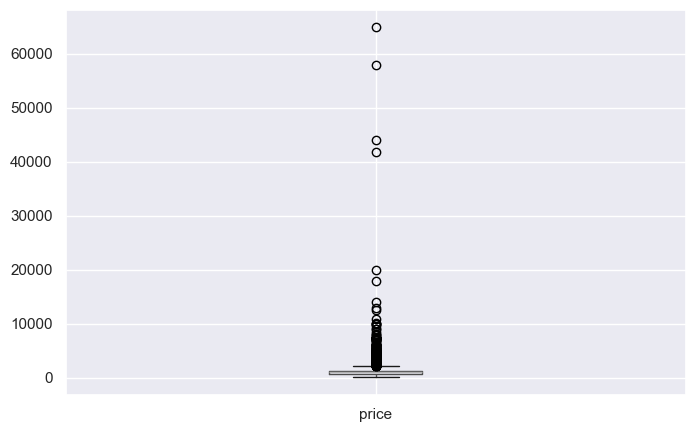

In [88]:
data_filtered.boxplot(column=['price'])
plt.show()

<Axes: xlabel='price', ylabel='Count'>

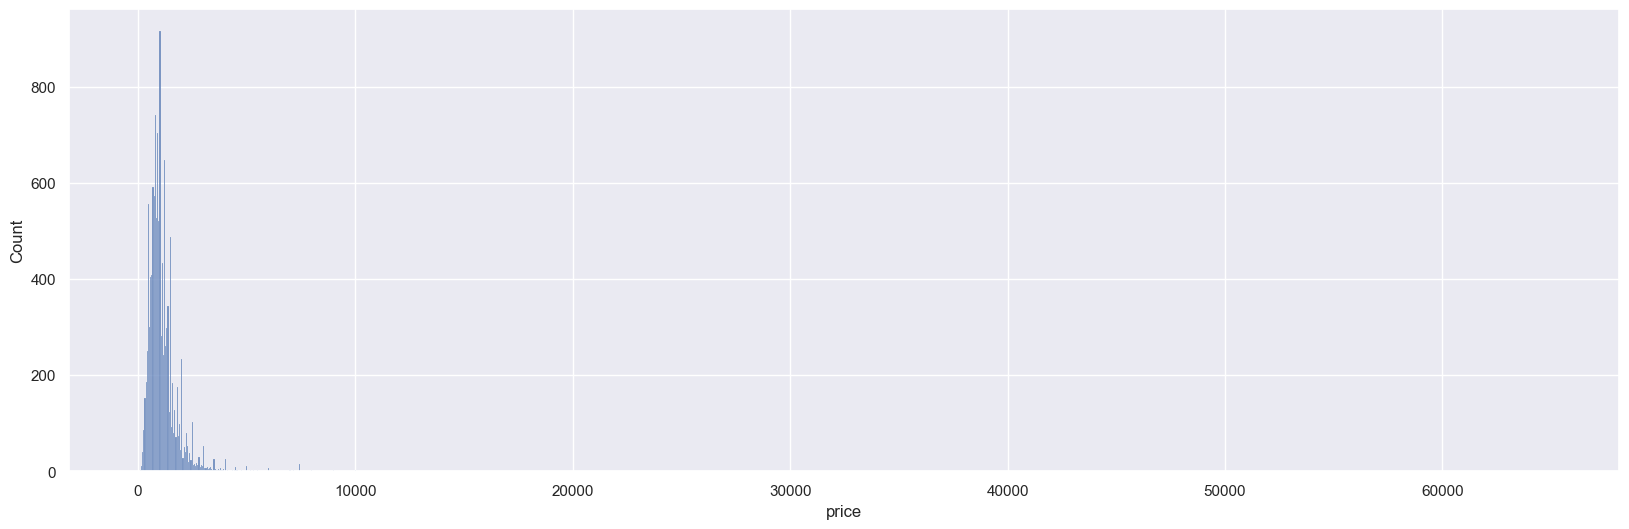

In [89]:
sns.set_theme(rc={"figure.figsize": (20, 6)})
sns.histplot(data_filtered['price'])

In [90]:

#skewness and kurtosis
print("Skewness: %f" % data_filtered['price'].skew())
print("Kurtosis: %f" % data_filtered['price'].kurt())

Skewness: 27.231634
Kurtosis: 1176.551085


Since the skewness has value>1 it is highly skewed.
Also kurtosis looks high as well which indicates presence of good amount of outliers

<Axes: xlabel='minimum_nights', ylabel='price'>

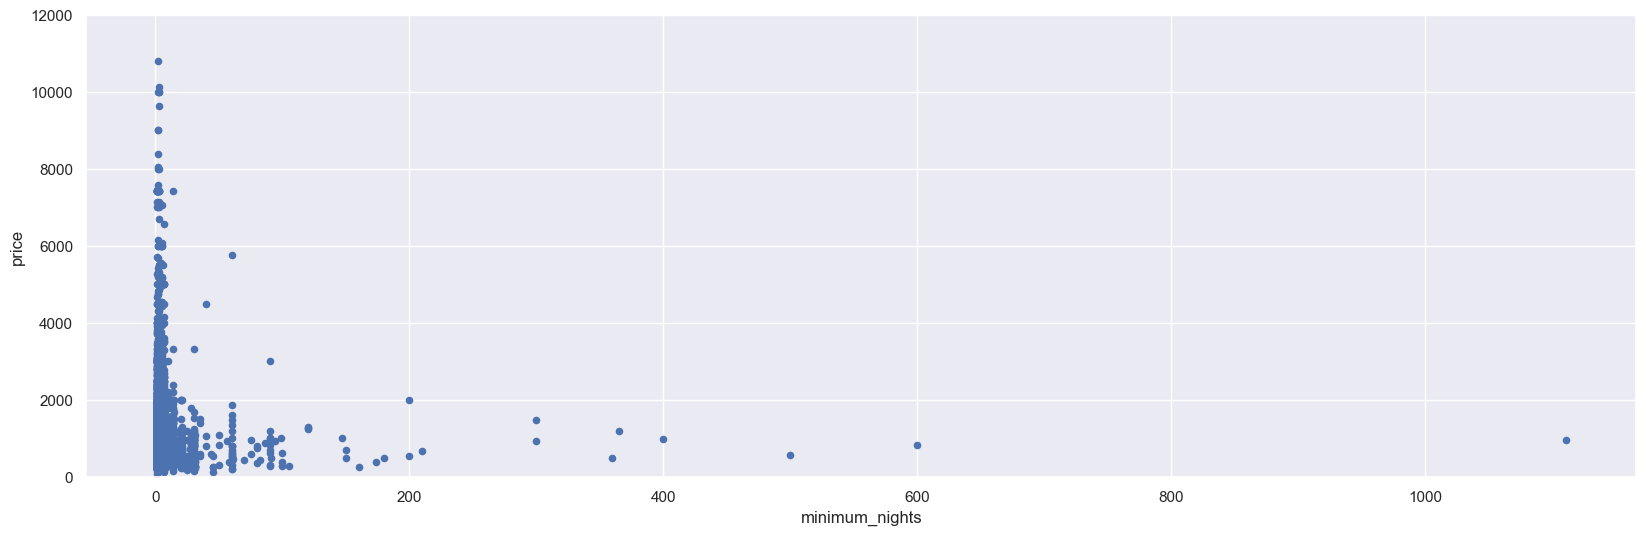

In [91]:
#checking the relationship between numerical variables!

# price vs minimum_nights

var='minimum_nights'

data=pd.concat([data_filtered['price'],data_filtered[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,12000))

In [92]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12126 entries, 0 to 13814
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12126 non-null  int64  
 1   name                            12126 non-null  object 
 2   host_id                         12126 non-null  int64  
 3   host_name                       12126 non-null  object 
 4   neighbourhood_cleansed          12126 non-null  object 
 5   latitude                        12126 non-null  float64
 6   longitude                       12126 non-null  float64
 7   room_type                       12126 non-null  object 
 8   price                           12126 non-null  float64
 9   minimum_nights                  12126 non-null  int64  
 10  number_of_reviews               12126 non-null  int64  
 11  last_review                     12126 non-null  object 
 12  review_scores_rating            12126

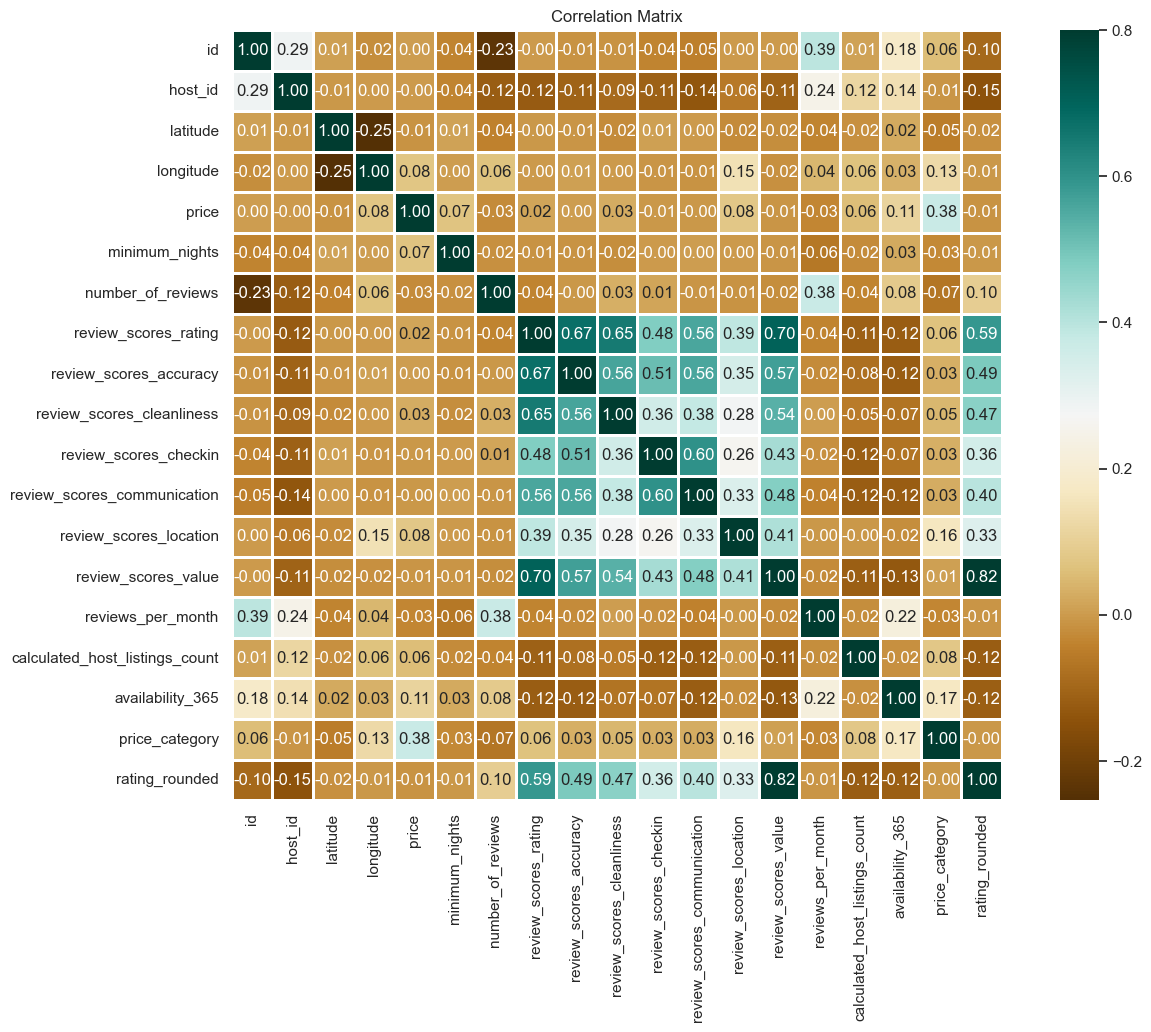

In [139]:
#corralation matrix
numeric_data = data_filtered.select_dtypes(include=['float64', 'int64'])

corrmat = numeric_data.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrmat, cmap='BrBG', fmt= '.2f' ,vmax=.8, square=True, linewidths=2, annot=True)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Count of no of listings in entire Kbh of each neighbourhood group!')

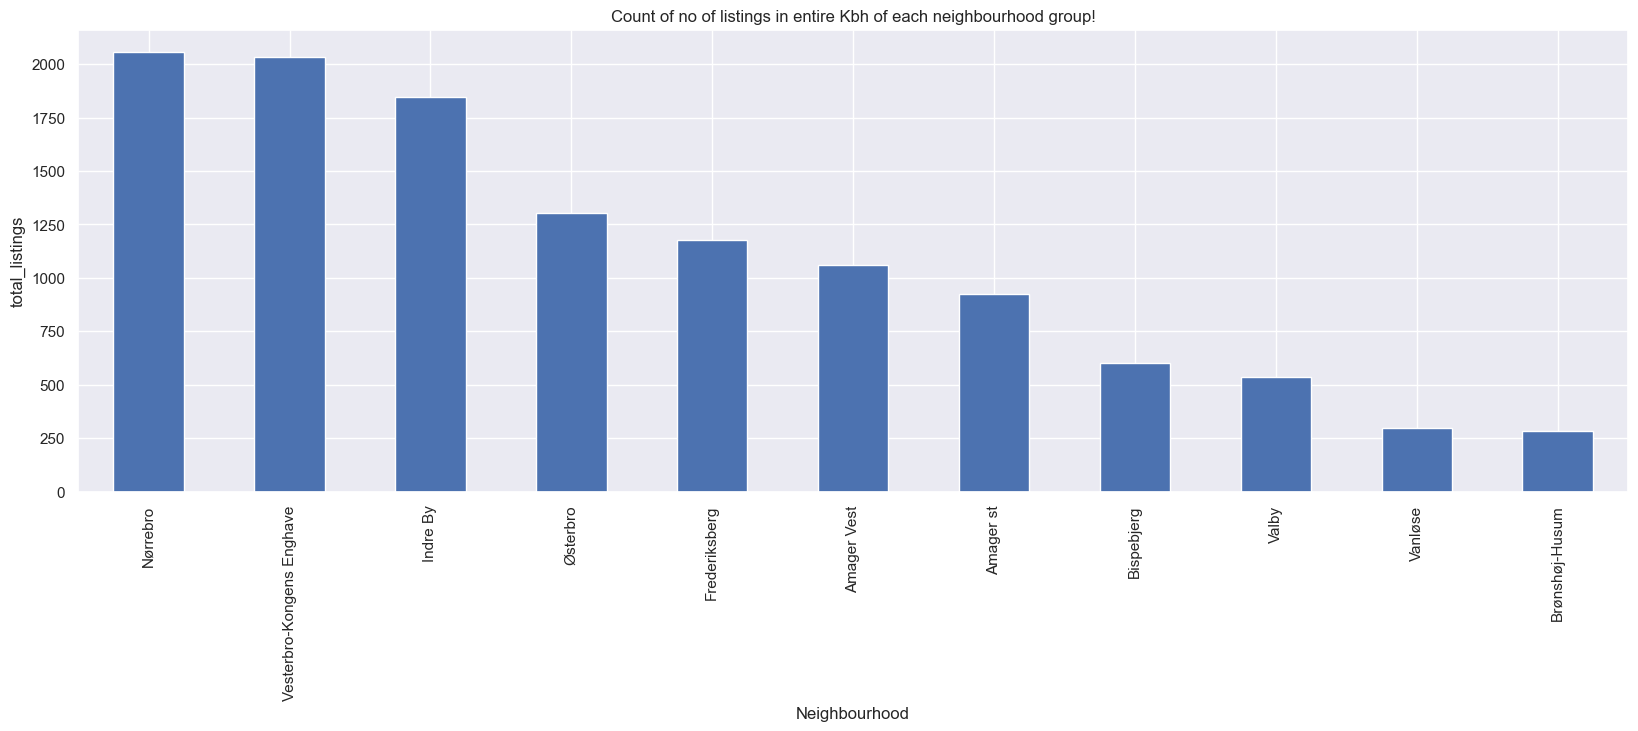

In [94]:
data_filtered['neighbourhood_cleansed'].value_counts().plot(kind='bar',color='b')
plt.xlabel('Neighbourhood')
plt.ylabel('total_listings')
plt.title('Count of no of listings in entire Kbh of each neighbourhood group!')

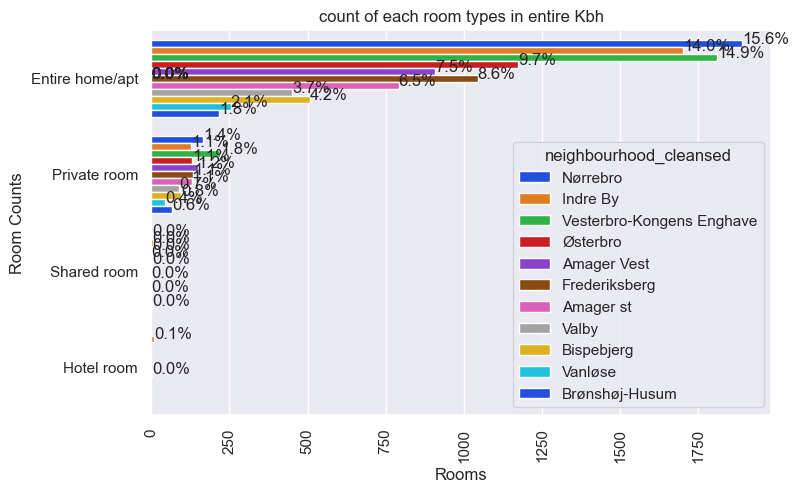

In [95]:
plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_cleansed',data=data_filtered,palette='bright')

total = len(data_filtered['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire Kbh')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

In [96]:
data_filtered.describe()

id       host_id      latitude     longitude         price  \
count  1.212600e+04  1.212600e+04  12126.000000  12126.000000  12126.000000   
mean   1.469716e+17  1.011950e+08     55.680638     12.558298   1155.454890   
std    2.682035e+17  1.262784e+08      0.020763      0.033181   1236.666009   
min    6.983000e+03  1.171800e+04     55.609510     12.435670     79.000000   
25%    1.729672e+07  1.294026e+07     55.666254     12.541080    721.000000   
50%    3.630308e+07  4.298586e+07     55.681275     12.555770    979.000000   
75%    5.350174e+07  1.436026e+08     55.695535     12.580838   1329.000000   
max    7.188292e+17  4.793598e+08     55.742800     12.651740  64900.000000   

       minimum_nights  number_of_reviews  review_scores_rating  \
count    12126.000000       12126.000000          12126.000000   
mean         4.359970          21.152895              4.804020   
std         16.714475          38.147244              0.283435   
min          1.000000           1.000000              0.000000   
25%          2.000000           4.000000              4.710000   
50%          3.000000           9.000000              4.890000   
75%          4.000000          23.000000              5.000000   
max       1111.000000         711.000000              5.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count            12126.000000               12126.000000   
mean                 4.845655                   4.692618   
std                  0.260298                   0.392819   
min                  0.000000                   0.000000   
25%                  4.800000                   4.560000   
50%                  4.930000                   4.800000   
75%                  5.000000                   5.000000   
max                  5.000000                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           12126.000000                 12126.000000   
mean                4.884260                     4.905462   
std                 0.249873                     0.232811   
min                 0.000000                     1.000000   
25%                 4.860000                     4.900000   
50%                 4.980000                     5.000000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  reviews_per_month  \
count            12126.000000         12126.000000       12126.000000   
mean                 4.826399             4.720620           0.907005   
std                  0.253852             0.306441           1.111503   
min                  1.000000             1.000000           0.010000   
25%                  4.750000             4.610000           0.230000   
50%                  4.900000             4.780000           0.530000   
75%                  5.000000             5.000000           1.120000   
max                  5.000000             5.000000          24.020000   

       calculated_host_listings_count  availability_365  price_category  \
count                    12126.000000      12126.000000    12126.000000   
mean                         3.710374         88.129144        0.499588   
std                         19.211000        119.400813        0.500020   
min                          1.000000          0.000000        0.000000   
25%                          1.000000          0.000000        0.000000   
50%                          1.000000         16.000000        0.000000   
75%                          1.000000        158.000000        1.000000   
max                        179.000000        365.000000        1.000000   

       rating_rounded  
count    12126.000000  
mean         4.809088  
std          0.418642  
min          1.000000  
25%          5.000000  
50%          5.000000  
75%          5.000000  
max          5.000000

In [97]:
#using quantile approach to remove outliers.
min_threshold,max_threshold= data_filtered.price.quantile([0.000,0.996])
min_threshold,max_threshold

(79.0, 6043.0)

In [98]:
data_filtered[data_filtered.price>max_threshold] #prices less than min threshold!


id                                               name  \
632               2360896  Large luxury flat overlooking Tour de France 2022   
918               3545890                    City center appartment / 230 m2   
1054              4241153                 Very spacious, with private garden   
1937              9576788                     Close to Metro, City and Beach   
2073             10761153   Room for 6+ persons, 2plan apartment with a view   
2139             11339117    “My Oasis”... a Cosy room in the Harte off Cph.   
2158             11521619                  Amazing view, 190 sqm in CPH city   
2590             14037316   Luxurious, modern and spacious appartment. CPH V   
2628             14275808                Two story design home in the ❤️ cph   
2685             14822244                 The humble luxury flat, Copenhagen   
2728             15141459            Clean room overlooking Copenhagen lakes   
2862             16122707      Unique Penthouse in the Center of Copenhagen!   
2902             16397010                         Cosy and spacey apartment!   
2908             16458482        Unique penthouse in the heart of Copenhagen   
3030             17364608      Great apartment in the heart of CPH, Østerbro   
3655             20844887                                                  0   
3759             21437629  Nørrebrogade with walking distance to the city...   
3761             21437657     Wonderful light apartment on Skindergade 3B in   
3762             21437658  Cosy new one bedroom apartment on Edvard Thomsens   
3767             21437896   Bright one-bedroom apartment at Robert Jacobsens   
3770             21437954  Nørrebrogade Apartments with walking distance ...   
3773             21438022    Nice and stylish and modern furnished 2 Bedroom   
4134             24155174    Beauty, comfort & style in the center of it all   
4202             24709492  Family friendly flat in calm green Vesterbro area   
4233             24837284  Cozy new apartment in popular area in Alliance...   
4276             25092140  New studio apartment in Amager at Robert Jacob...   
4278             25131597           New studio apartment in Amager at Robert   
4444             26014857   Newly renovated, wonderful, and light three room   
4767             27305814  Dejlig ny lejlighed i Sydhavnen tæt på vand og by   
4977             29140472    Light and Cozy Flat in the midst of Copenhagen!   
5005             29351375      Brand new 9 persons flat 10 minutes to Tivoli   
5031             29626197                    Townhouse in central Copenhagen   
5108             30160035     2 bedroom light, modern apartment with balcony   
5339             32103933  AMAZING HISTORICAL APARTMENT  IN THE HEART OF CPH   
6153             36499833                    City Sancturay - 6 person Villa   
7211             43353113     Penthouse w. Private Rooftop at the Waterfront   
7494             44224836  Cozy and bright 2-room apartment with big balcony   
7496             44226456            Grøn landsbyidyl i hjertet af København   
7817             46864466       Newly renovated wonderful light apartment on   
7827             46956246   Modern bright 2 bedroom apartment by the harbour   
7831             46956277  Modern 102 sqm. 3 bedroom apartment situated in a   
7856             47106651  Modern and spacious 2 bedroom apartment locate...   
7883             47541044    Great apartment Islands brygge. Private parking   
8177             49856916          310m apartment in the heart of Copenhagen   
9608             54258882  ★Luxury Penthouse · CPH's Finest, Shopping Str...   
9879   565838456312285941    Fantastic family & friends apartment with 5 BR.   
11375  645635742364082802    Exclusive 260m2 apartment in central Copenhagen   
11518  649757785139921922          Cozy apartment in the heart of Copenhagen   
13565            21194185                                     Poshtel PopUpⓇ   

         host_id      

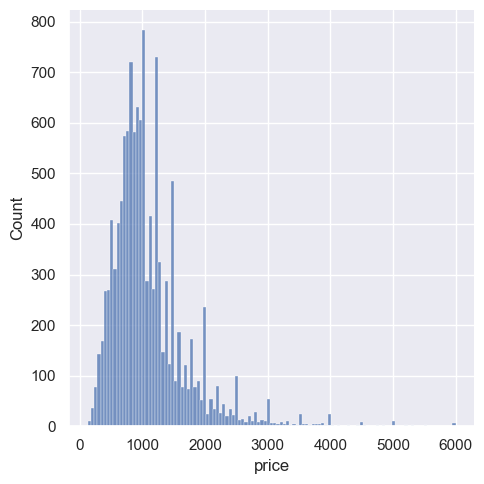

In [99]:
data_cleaned= data_filtered[(data_filtered.price>min_threshold)&(data_filtered.price<max_threshold)]
sns.displot(data_cleaned['price'])


In [100]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [101]:
lower_bound,upper_bound = outlier_treatment(data_filtered['price'])


In [102]:
data_filtered[(data_filtered.price < lower_bound) | (data_filtered.price > upper_bound)] #looking at the low and upper range outliers


id                                               name  \
1                   26057                Lovely house - most attractive area   
2                   26473          City Centre Townhouse Sleeps 1-10 persons   
8                   37159                  Unique space on greatest location   
13                  71168                   beautiful penthouse with rooftop   
32                 194022                           Penthouse in central CPH   
...                   ...                                                ...   
13721  617354783809920747                Wonderful house close to Copenhagen   
13731            36177939  Beautiful  villa in Hellerup 6 km from Copenhagen   
13744            35274278   Lys og dejlig ny-istandsat patricia villa, 200m2   
13768             4014512        Vidunderlig funkis villa med stort udeareal   
13794            41933936  Garden Villa - Biking distance CPH, beach & ca...   

         host_id            host_name neighbourhood_cleansed  latitude  \
1         109777                 Kari               Indre By  55.69307   
2         112210                Julia               Indre By  55.67602   
8         160390             Jeanette               Indre By  55.68547   
13        141625  Pernille & Frederik          Frederiksberg  55.67806   
32        941790               Morten               Nørrebro  55.68998   
...          ...                  ...                    ...       ...   
13721   38332485                 Anna             Bispebjerg  55.73876   
13731  246552321            Alejandra             Bispebjerg  55.73311   
13744  265200436                Claus               Østerbro  55.73807   
13768   17876427                  Søs               Østerbro  55.73737   
13794  330461596                 Line             Bispebjerg  55.73450   

       longitude        room_type   price  minimum_nights  ...  \
1      12.576490  Entire home/apt  2600.0               4  ...   
2      12.575400  Entire home/apt  3250.0               3  ...   
8      12.565430  Entire home/apt  2916.0               5  ...   
13     12.550440  Entire home/apt  2302.0               2  ...   
32     12.562230  Entire home/apt  2302.0               3  ...   
...          ...              ...     ...             ...  ...   
13721  12.521260  Entire home/apt  2500.0               2  ...   
13731  12.544240  Entire home/apt  2850.0               2  ...   
13744  12.553940  Entire home/apt  2500.0               5  ...   
13768  12.550755  Entire home/apt  3000.0               3  ...   
13794  12.509730  Entire home/apt  2500.0               4  ...   

       review_scores_cleanliness review_scores_checkin  \
1                           4.96                  4.93   
2                           4.44                  4.78   
8                           5.00                  5.00   
13                          4.90                  4.90   
32                          4.24                  4.85   
...                          ...                   ...   
13721                       5.00                  5.00   
13731                       4.75                  5.00   
13744                       5.00                  5.00   
13768                       5.00                  5.00   
13794                       4.67                  4.67   

       review_scores_communication  review_scores_location  \
1                             4.86                    4.94   
2                             4.70                    4.89   
8                             5.00                    4.89   
13                            5.00                    5.00   
32                            4.89                    4.89   
...                            ...                     ...   
13721                         5.00                    4.50   
13731                         5.00                    5.00   
13744                         5.00                    5.00   
13768                         5.00                    5.00   
1

In [103]:
data_cleaned1 = data_filtered[(data_filtered.price>lower_bound) & (data_filtered.price<upper_bound)]
data_cleaned1

id                                               name  \
0                    6983                               Copenhagen 'N Livin'   
3                   29118                    Best Location in Cool Istedgade   
4                   31094  Beautiful, spacious, central, renovated Penthouse   
5                   32379  165 m2  artist flat on Vesterbro, with 2 bathr...   
6                   32841                Cozy flat for Adults/Quiet for kids   
...                   ...                                                ...   
13808  646726550705810749          Ny rummelig lejlighed med tilhørende kat.   
13809  646941499450912133               Big beautiful and charming apartment   
13811  647809303952891559  Dejligt lille hus med flere hyggekroge ude og ...   
13812  650819220455514228  Lejlighed i Storkøbenhavn. 13 minutter fra cen...   
13814  648436253362373119     Big Bedroom connected with a large living room   

         host_id       host_name     neighbourhood_cleansed   latitude  \
0          16774           Simon                   Nørrebro  55.686410   
3         125230            Nana  Vesterbro-Kongens Enghave  55.670230   
4         129976            Ebbe  Vesterbro-Kongens Enghave  55.666602   
5         140105            Lise  Vesterbro-Kongens Enghave  55.672638   
6         142143  Anders & Maria                   Østerbro  55.711760   
...          ...             ...                        ...        ...   
13808   54229471          Morten             Brønshøj-Husum  55.739028   
13809  141288846           Tanja                 Bispebjerg  55.730481   
13811    4862421        Kathrine                      Valby  55.667782   
13812  134647873             Tim                      Valby  55.659536   
13814  141288846           Tanja                 Bispebjerg  55.731420   

       longitude        room_type   price  minimum_nights  ...  \
0      12.547410  Entire home/apt   898.0               3  ...   
3      12.555040  Entire home/apt   725.0               7  ...   
4      12.555283  Entire home/apt  1954.0               3  ...   
5      12.552493  Entire home/apt  1280.0               3  ...   
6      12.570910  Entire home/apt   617.0             100  ...   
...          ...              ...     ...             ...  ...   
13808  12.487433  Entire home/apt   856.0               6  ...   
13809  12.521243  Entire home/apt  1050.0               2  ...   
13811  12.463285  Entire home/apt   450.0               3  ...   
13812  12.474726  Entire home/apt   400.0               1  ...   
13814  12.521770     Private room   420.0               2  ...   

       review_scores_cleanliness review_scores_checkin  \
0                           4.78                  4.86   
3                           4.73                  5.00   
4                           4.88                  4.87   
5                           4.92                  4.88   
6                           4.50                  5.00   
...                          ...                   ...   
13808                       4.00                  5.00   
13809                       5.00                  5.00   
13811                       5.00                  5.00   
13812                       4.67                  5.00   
13814                       5.00                  5.00   

       review_scores_communication  review_scores_location  \
0                             4.89                    4.73   
3                             5.00                    4.87   
4                             4.82                    4.80   
5                             4.91                    4.88   
6                             5.00                    4.50   
...                            ...                     ...   
13808                         5.00                    4.50   
13809                         5.00                    4.75   
13811                         5.00                    4.67   
13812                         5.00                    4.67   
1

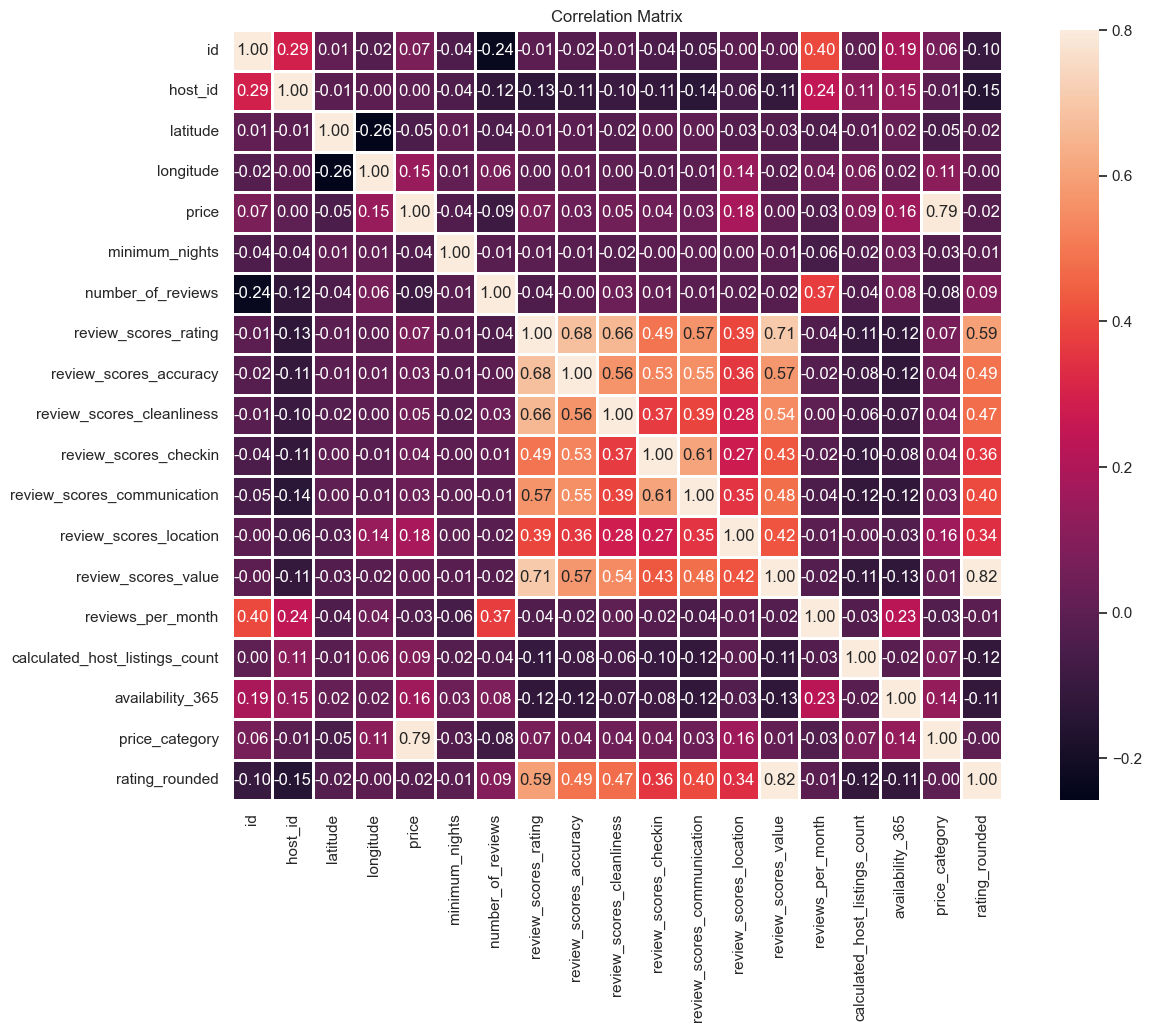

In [141]:
#corralation matrix
numeric_data = data_cleaned1.select_dtypes(include=['float64', 'int64'])

corrmat = numeric_data.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corrmat, fmt= '.2f' ,vmax=.8, square=True, linewidths=2, annot=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: >

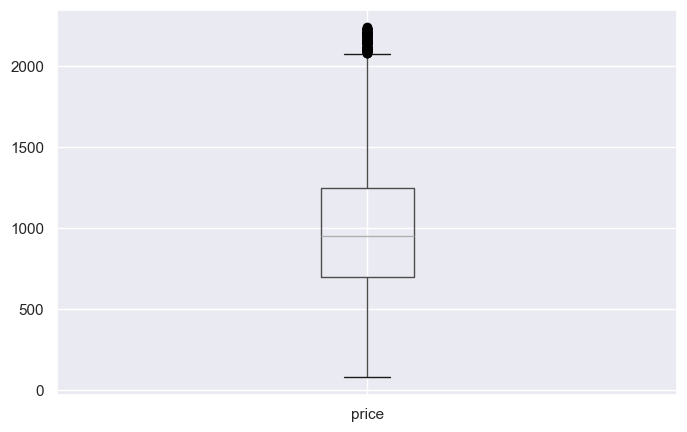

In [104]:
data_cleaned1.boxplot(column='price') #the boxplot for price now looks good without outliers!


In [105]:
#skewness and kurtosis
print("Skewness: %f" % data_cleaned1['price'].skew())
print("Kurtosis: %f" % data_cleaned1['price'].kurt())

Skewness: 0.664592
Kurtosis: 0.033300


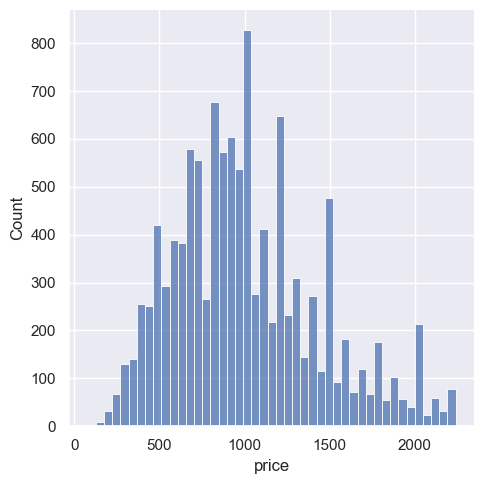

In [106]:
sns.displot(data_cleaned1['price'])


In [107]:
data_cleaned1['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Nørrebro                     2007
Vesterbro-Kongens Enghave    1959
Indre By                     1584
Østerbro                     1226
Frederiksberg                1110
Amager Vest                  1013
Amager st                     884
Bispebjerg                    588
Valby                         528
Vanløse                       293
Brønshøj-Husum                275
Name: count, dtype: int64

C:\Users\lilla\AppData\Local\Temp\ipykernel_2760\4022374320.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



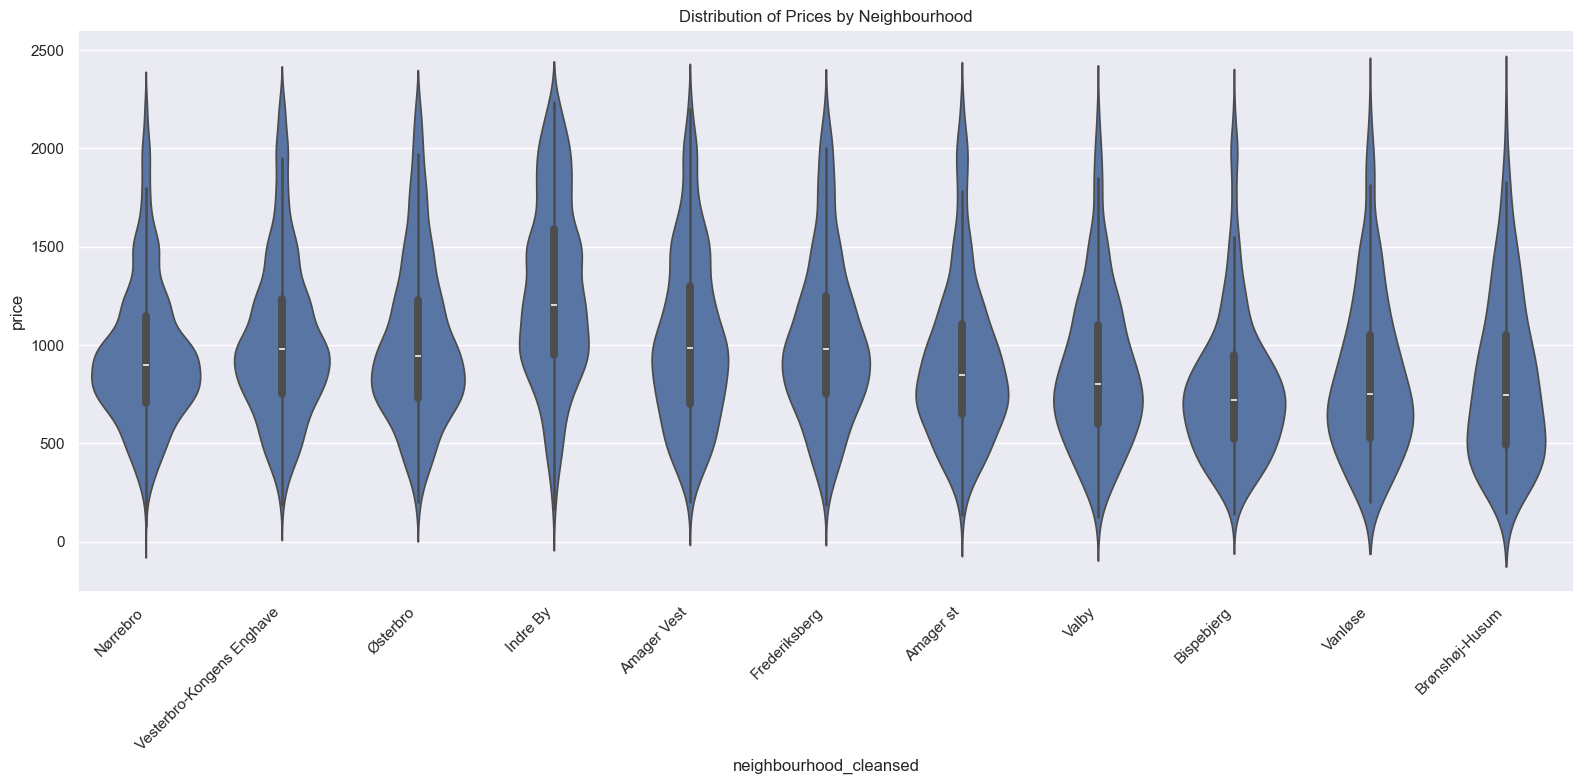

In [108]:
plt.figure(figsize=(16, 8))

ax= sns.violinplot(x='neighbourhood_cleansed',y='price',data=data_cleaned1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add title and adjust layout
plt.title('Distribution of Prices by Neighbourhood')
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\lilla\AppData\Local\Temp\ipykernel_2760\3026151922.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



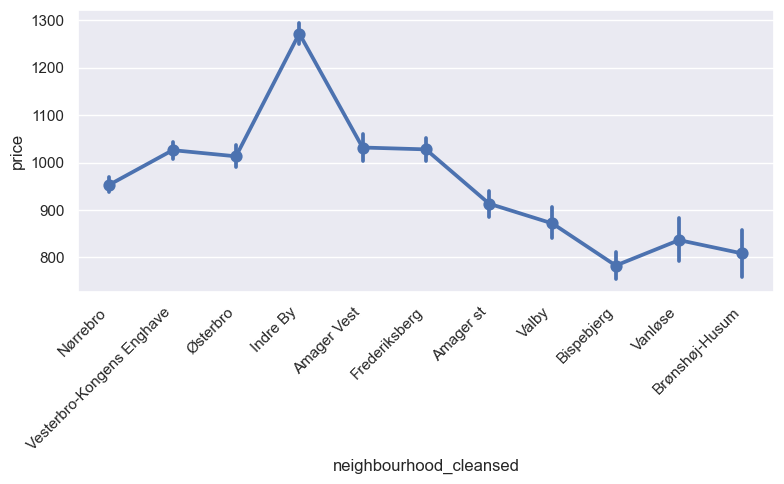

In [109]:
#looking for the average price each neighbourhood groups holds in a seaborn pointplot
az=sns.pointplot(x = 'neighbourhood_cleansed', y='price', data=data_cleaned1, estimator=mean)
az.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

plt.show()

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
features = ['neighbourhood_cleansed']
X = data_cleaned1[features]
y = data_cleaned1['price']

# Handle missing values in 'neighbourhood_cleansed' (if any)
X = X.dropna()
y = y[X.index]

# One-hot encode the 'neighbourhood_cleansed' feature
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['neighbourhood_cleansed'])
    ])

X_encoded = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)


In [111]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Metrics
sse = np.sum((y_test - y_pred_linear) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
ssr = sst - sse
r2 = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - SSE: {sse:.2f}, SSR: {ssr:.2f}, SST: {sst:.2f}, R2: {r2:.2f}")


Linear Regression - SSE: 366039512.51, SSR: 43715313.69, SST: 409754826.20, R2: 0.11


Linear Regression - SSE: 366039512.51, SSR: 43715313.69, SST: 409754826.20, R2: 0.11


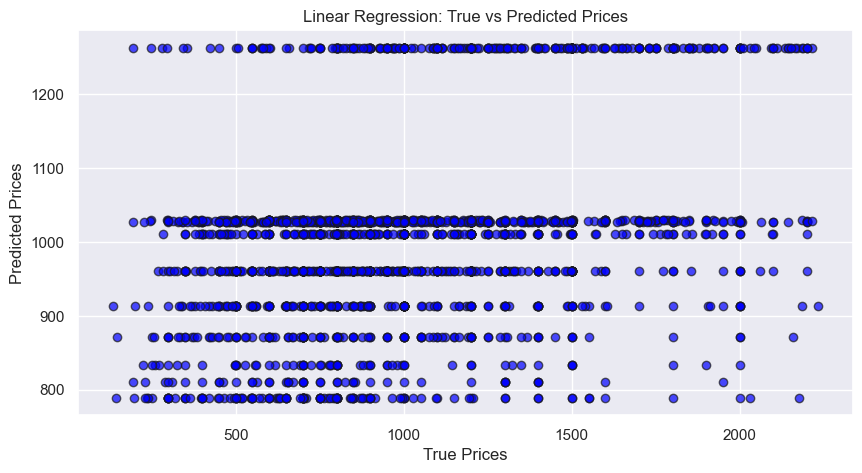

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: True vs Predicted Prices')
plt.show()


In [113]:
# Polynomial Regression Model
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predict on test data
X_poly_test = poly_features.transform(X_test)
y_pred_poly = poly_model.predict(X_poly_test)

# Metrics
sse_poly = np.sum((y_test - y_pred_poly) ** 2)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree {degree}) - SSE: {sse_poly:.2f}, R2: {r2_poly:.2f}")


Polynomial Regression (Degree 2) - SSE: 366039512.51, R2: 0.11


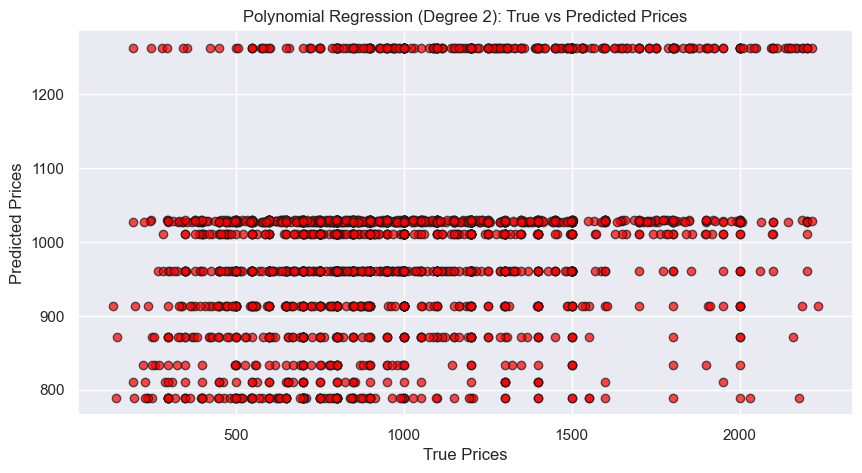

In [114]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_poly, color='red', edgecolor='k', alpha=0.7)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Polynomial Regression (Degree {degree}): True vs Predicted Prices')
plt.show()


In [115]:
# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Metrics
sse_ridge = np.sum((y_test - y_pred_ridge) ** 2)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - SSE: {sse_ridge:.2f}, R2: {r2_ridge:.2f}")


Ridge Regression - SSE: 366049271.09, R2: 0.11


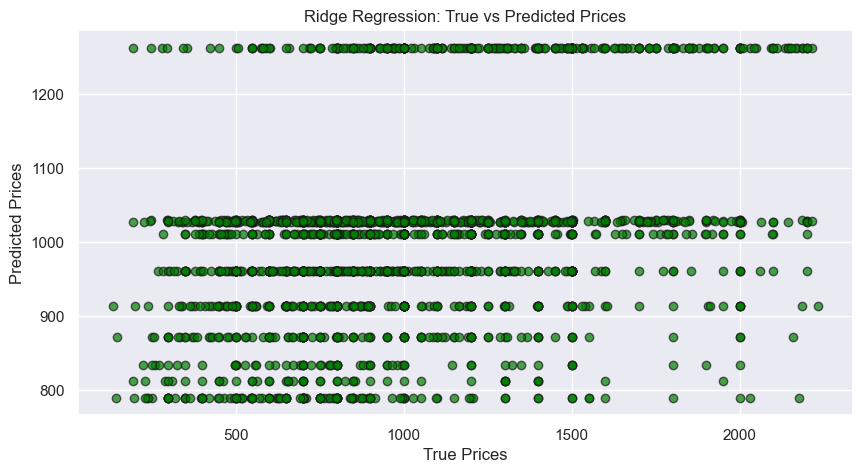

In [116]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_ridge, color='green', edgecolor='k', alpha=0.7)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression: True vs Predicted Prices')
plt.show()
